In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download(["names",'shakespeare',"stopwords","state_union","twitter_samples","movie_reviews","averaged_perceptron_tagger","vader_lexicon","punkt",])

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [41]:
city = "KualaLumpur"

In [45]:
f = open("Hotel Reviews DB/"+ city +"/"+ city +"_Hotels_Master.csv", "r")
urls = f.readlines()
f.close()

#import re
#pattern = "Reviews-(.*?)-Kuala"
#hotels = []
#for url in urls:
#    hotels.append(re.search(pattern, url).group(1))

#print(len(hotels))
urls

['https://www.tripadvisor.in/Hotel_Review-g298570-d3730389-Reviews-Aloft_Kuala_Lumpur_Sentral-Kuala_Lumpur_Wilayah_Persekutuan.html#REVIEWS\n',
 'https://www.tripadvisor.in/Hotel_Review-g298570-d15189916-Reviews-The_RuMa_Hotel_and_Residences-Kuala_Lumpur_Wilayah_Persekutuan.html#REVIEWS\n',
 'https://www.tripadvisor.in/Hotel_Review-g298570-d15226099-Reviews-Pavilion_Hotel_Kuala_Lumpur_Managed_by_Banyan_Tree-Kuala_Lumpur_Wilayah_Persekutuan.html#REVIEWS\n',
 'https://www.tripadvisor.in/Hotel_Review-g298570-d14166349-Reviews-Banyan_Tree_Kuala_Lumpur-Kuala_Lumpur_Wilayah_Persekutuan.html#REVIEWS\n',
 'https://www.tripadvisor.in/Hotel_Review-g298570-d301416-Reviews-Mandarin_Oriental_Kuala_Lumpur-Kuala_Lumpur_Wilayah_Persekutuan.html#REVIEWS\n',
 'https://www.tripadvisor.in/Hotel_Review-g298570-d13424907-Reviews-Four_Seasons_Hotel_Kuala_Lumpur-Kuala_Lumpur_Wilayah_Persekutuan.html#REVIEWS\n',
 'https://www.tripadvisor.in/Hotel_Review-g298570-d14023546-Reviews-W_Kuala_Lumpur-Kuala_Lumpur_Wil

In [43]:
f = open("Hotel Reviews DB/"+ city +"/overall_rating.csv", "r")
overall_rating = f.readlines()
f.close()

In [35]:
polarity = []
for i in range(1,21):
    f1 = open("Hotel Reviews DB/"+ city +"/Reviews/"+ city +"_reviews_"+ str(i) +".csv", "r")
    f2 = open("Hotel Reviews DB/"+ city +"/Ratings/"+ city +"_ratings_"+ str(i) +".csv", "r")
    reviews = []
    ratings = []
    polscores = []
    reviews = f1.readlines()
    for i in range(0, len(reviews)):
        reviews[i] = reviews[i].rstrip("\n")
    ratings = f2.readlines()
    for i in range(0,len(ratings)):
        ratings[i] = float(ratings[i].rstrip("\n"))
    f1.close()
    f2.close()
    for review in reviews:
        polscores.append(sia.polarity_scores(review)['compound'])
    polarity.append(sum(polscores)/len(polscores))

In [36]:
print(polarity)
print(overall_rating)

[0.8376830000000001, 0.8616549999999995, 0.7767473684210524, 0.8178269999999995, 0.7181499999999998, 0.6578430000000001, 0.7417059999999998, 0.8784350000000001, 0.8333750000000001, 0.5721489999999999, 0.9240905263157895, 0.7848900000000003, 0.8250144444444445, 0.7526480000000001, 0.7476130000000005, 0.6141929999999997, 0.7427389473684209, 0.7915339999999997, 0.8042670000000001, 0.6762659340659344]
['4.5\n', '4.5\n', '4.0\n', '4.5\n', '4.5\n', '4.5\n', '4.5\n', '4.0\n', '4.5\n', '4.5\n', '4.0\n', '4.0\n', '4.0\n', '4.0\n', '4.5\n', '4.0\n', '4.5\n', '4.5\n', '4.0\n', '4.0']


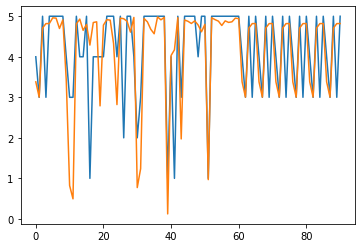

In [39]:
from matplotlib import pyplot as plt
plt.plot(ratings)
plt.plot([2.5*(i+1) for i in polscores])
plt.show()

In [40]:
import csv
# opening the csv file in 'w+' mode
filename = "VizData_"+ city +".csv"
file = open(filename, 'w', newline ='\n')
  
# writing the data into the file
with file:    
    write = csv.writer(file, dialect='excel')
    for i in range(0,len(hotels)):
        write.writerow([hotels[i].replace("_"," "), round(polarity[i], 5), float(overall_rating[i].rstrip("\n"))])
file.close()